In [1]:
#Capstone 2
#Preprocessing and training

In [122]:
#imports
import pandas as pd
import numpy as np
import datetime as dt

# Import regression modules
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import sklearn.model_selection
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from scipy.stats import expon


# Show plots inline
%matplotlib inline
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
mpl.style.reload_library()
import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


from sklearn.preprocessing import OneHotEncoder as OHE
from sklearn.metrics import accuracy_score, f1_score

In [3]:
df_data = pd.read_csv('healthcare_homeless_cleaned.csv')
cali_df = pd.read_csv('% cumulative change in homelessness in ca.csv')

In [4]:
df_data = df_data[['Year', 'Overall Homeless', 'Housing Prices', 'Unemployment rate', 'Obama ACA Indicator', 'CPI California, Urban Consumers', 'Healthcare Cost, California']]
df_data = df_data.rename(columns = {'Overall Homeless':'Overall Homeless LA'})
df_data

,Year,Overall Homeless LA,Housing Prices,Unemployment rate,Obama ACA Indicator,"CPI California, Urban Consumers","Healthcare Cost, California"
0,2007,71320,254.0,5.1,0.0,217.0,209334.000000
1,2008,65111,208.0,7.5,0.0,225.0,220894.000000
2,2009,33243,176.0,11.7,0.0,224.0,229415.000000
3,2010,63706,174.0,12.6,1.0,227.0,241845.000000
4,2011,56257,166.0,12.2,1.0,233.0,253703.000000
5,2012,49955,165.0,11.0,1.0,238.0,267048.000000
6,2013,52442,180.0,9.8,1.0,242.0,277008.000000
7,2014,43854,204.0,8.2,1.0,246.0,288330.000000
8,2015,41174,216.0,6.7,1.0,250.0,311146.000000
9,2016,34393,232.0,5.3,1.0,255.0,325931.000000


In [5]:
cali_df = cali_df['% Change in total homelessness statewide']#cali_df

0     0.305160
1     0.328629
2     0.466704
3     0.469056
4     0.449707
5     0.510425
6     0.530122
7     0.591890
8     0.567325
9     0.535432
10    0.379124
11    0.395678
12    0.199110
13    0.122880
14    2.156522
15    0.057591
Name: % Change in total homelessness statewide, dtype: float64

In [6]:
#If I fit a regression line to this data, the overall homelessness will include LA and could create errors. However, I might want 
#to check if LA is an outlier compared to the statewide trends. I will concatenate the datasets here, but run a regression with
# the original dataframe, df_data.

data = pd.concat([df_data, cali_df], axis=1)
data

,Year,Overall Homeless LA,Housing Prices,Unemployment rate,Obama ACA Indicator,"CPI California, Urban Consumers","Healthcare Cost, California",% Change in total homelessness statewide
0,2007,71320,254.0,5.1,0.0,217.0,209334.000000,0.305160
1,2008,65111,208.0,7.5,0.0,225.0,220894.000000,0.328629
2,2009,33243,176.0,11.7,0.0,224.0,229415.000000,0.466704
3,2010,63706,174.0,12.6,1.0,227.0,241845.000000,0.469056
4,2011,56257,166.0,12.2,1.0,233.0,253703.000000,0.449707
5,2012,49955,165.0,11.0,1.0,238.0,267048.000000,0.510425
6,2013,52442,180.0,9.8,1.0,242.0,277008.000000,0.530122
7,2014,43854,204.0,8.2,1.0,246.0,288330.000000,0.591890
8,2015,41174,216.0,6.7,1.0,250.0,311146.000000,0.567325
9,2016,34393,232.0,5.3,1.0,255.0,325931.000000,0.535432


In [7]:
data['% Change in total homelessness statewide'] = pd.to_numeric(data['% Change in total homelessness statewide'], errors='coerce')
mean = data['% Change in total homelessness statewide'].mean()
# Fill missing values with the mean
data['% Change in total homelessness statewide'] = data['% Change in total homelessness statewide'].fillna(mean)

In [57]:
#After finishing some cleanup I will now import a linear regression model.
X = df_data.drop('Overall Homeless LA', axis = 1)
y = df_data['Overall Homeless LA']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# This creates a LinearRegression object
linear = LinearRegression()
linear.fit(X, y)
y_pred = linear.predict(X)

# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': linear.coef_})[['features', 'estimatedCoefficients']]


,features,estimatedCoefficients
0,Year,-4659.100578
1,Housing Prices,102.661805
2,Unemployment rate,130.262596
3,Obama ACA Indicator,12521.914822
4,"CPI California, Urban Consumers",850.671380
5,"Healthcare Cost, California",-0.318884


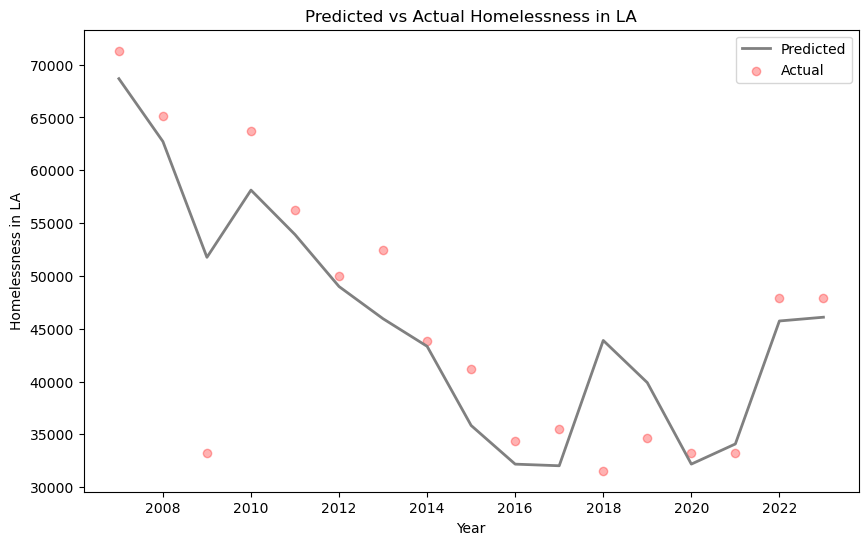

In [59]:
#plotting the data
plt.figure(figsize=(10, 6))

# Plot the predicted values (line)
plt.plot(data['Year'], y_pred, color='gray', label='Predicted', linewidth=2)

# Scatter the actual data points
plt.scatter(x=data['Year'], y=y, color='red', alpha=0.3, label='Actual')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Homelessness in LA')
plt.title('Predicted vs Actual Homelessness in LA')
plt.legend()

# Show the plot
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x15bb30850>,
 'caps': [<matplotlib.lines.Line2D at 0x15bb58c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x15bb30b50>],
 'medians': [<matplotlib.lines.Line2D at 0x15bb5a6d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x15bb5b210>],
 'means': []}

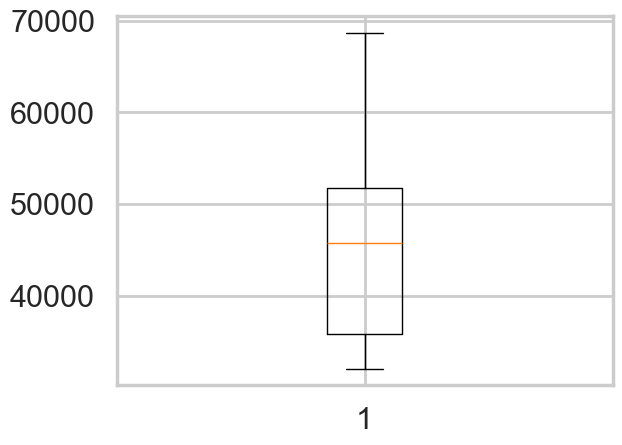

In [89]:
#It looks likethe model is being pulled by outliers, notably in 2009, possibly after 2022, and might be overfitting around 
#2017-2020. 

plt.boxplot(y_pred)

Text(0.5, 1.0, 'Residuals vs Leverage Plot')

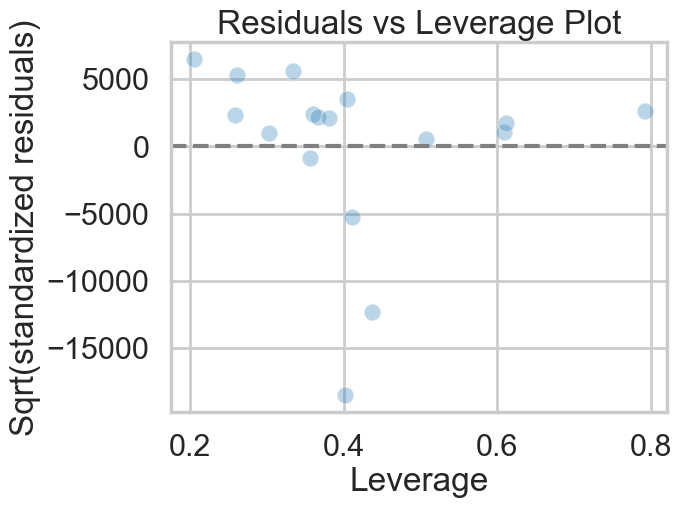

In [91]:
# It does not show any outliers. I will try to make some adjustments to understand those errors. I'll first check the residuals.

model = smf.ols(formula='y ~ X', data= df_data) 
results = model.fit()

# Get influence measures (including leverage)
residuals = results.resid 
fitted_value = results.fittedvalues 
stand_resids = results.resid_pearson 
influence = results.get_influence() 
leverage = influence.hat_matrix_diag 

# Plot leverage vs residuals (influence plot)
# Residual vs Leverage Plot 
sns.scatterplot(x=leverage, y=residuals, alpha=0.3) 
plt.axhline(y=0, color='grey', linestyle='dashed') 
plt.xlabel('Leverage') 
plt.ylabel('Sqrt(standardized residuals)') 
plt.title('Residuals vs Leverage Plot') 

In [106]:
#In the graph of actual versus predicted homelessness, the data looks exponential and like a regular regression line will not 
#fit the model accurately. I will try some other models to see whether they have better outcomes. I'll first just look at the 
#summary to get a quantitative metric.

model = smf.ols(formula='y ~ X', data= df_data).fit() 
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     4.757
Date:                Sun, 15 Sep 2024   Prob (F-statistic):             0.0152
Time:                        12:39:53   Log-Likelihood:                -172.79
No. Observations:                  17   AIC:                             359.6
Df Residuals:                      10   BIC:                             365.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.275e+06    1.8e+07      0.517      0.6

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
#It looks like none of the variables are statistically significant at the alpha<0.1 level and two are significant at the 
#alpha<0.5 level, the ACA indicator and the CPI for urban consumers. It has a fairly high R-squared level at 0.741, but
#the adjusted R-squared is only 0.585. It also raises warnings that there might be collinearity or other problems, while 
#I omitted the statewide CA data (as it would be inclusive of the LA data) these variables all showed high correlation measures
#with year, indicating that these are variables with predictable fluctuation each year and might appear collinear.

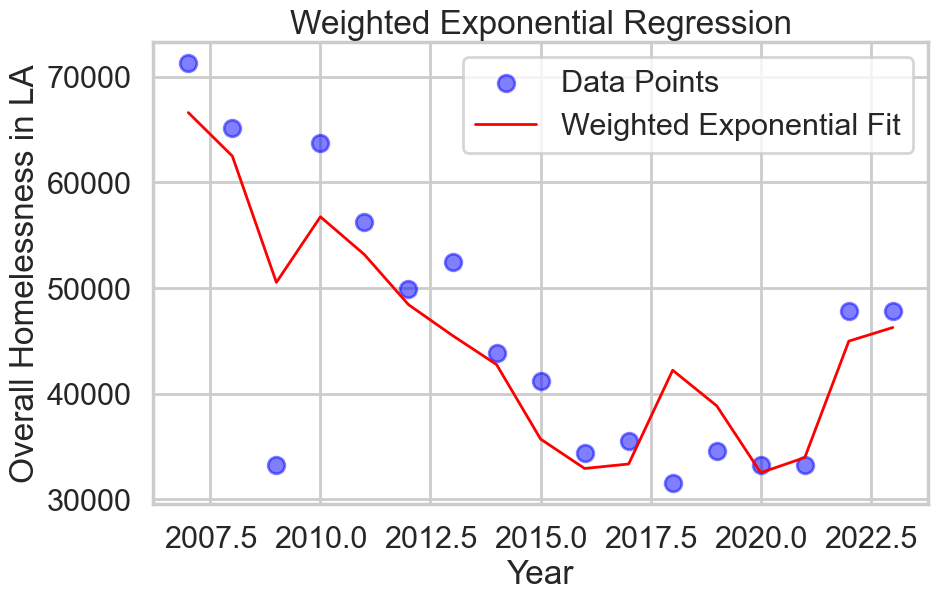

In [156]:
X = df_data.drop('Overall Homeless LA', axis=1)
y = df_data['Overall Homeless LA']

# Prepare Y & ln(Y)
Y = y
ln_Y = np.log(Y)

# Define weights for each sample 
weights = 1 / (Y.var()**2)  

# Extend weights to match the number of samples in X
weights_array = np.full(X.shape[0], weights)  # Create an array of the scalar weight with the same length as X

# Fit the weighted exponential regression
exp_reg_weighted = LinearRegression()
exp_reg_weighted.fit(X, ln_Y, sample_weight=weights_array)

# Get predicted values of Y
Y_pred_weighted = np.exp(exp_reg_weighted.predict(X))

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df_data['Year'], Y, label='Data Points', color='blue', alpha=0.5)
plt.plot(df_data['Year'], Y_pred_weighted, label='Weighted Exponential Fit', color='red', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Overall Homelessness in LA')
plt.title('Weighted Exponential Regression')
plt.legend()
plt.show()